In [1]:
import tensorflow as tf
import pandas as pd
from molgraph.models import GradientActivationMapping
from molgraph.chemistry import vis
from helpers import encode, encoder

def make_gradcam_heatmap(input_structure, model=None, return_prob=False):
    gam_model = GradientActivationMapping(
        model,
        [i.name for i in model.layers if "conv" in i.name], # all conv layers by default
        output_activation=None,
        discard_negative_values=True
    )
    graph = encode(input_structure)
    gam = gam_model(graph)
    if return_prob:
        return model.predict(graph)
    return vis.visualize_maps(molecule=input_structure, maps=gam[0])


model_file = "../saved_models/GCNII"
model = tf.keras.models.load_model(model_file)

2023-12-21 17:00:58.885925: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-21 17:00:58.887053: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 17:00:58.911026: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 17:00:58.911456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-21 17:00:59.352799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
df = pd.read_csv("../data/SMILES_test/test_data_all.csv").query("covalent == 1")
probs = model.predict(encoder(df.SMILES.values))
df["prob"] = probs

14/14 [==============================] - 4s 9ms/step


In [3]:
df = df.sort_values(by="prob", ascending=False).reset_index(drop=True)
df

,SMILES,InChI,warhead_category,covalent,prob
0,[H]C#CC([H])([H])OC([H])([H])OC([H])([H])OC([H...,InChI=1S/C19H22O6/c1-2-7-21-13-23-14-22-8-9-24...,atypical,1,0.998513
1,[H]C(=O)N([H])[C@]([H])(C(=O)O[C@@]([H])(C([H]...,InChI=1S/C29H49NO5/c1-5-7-9-11-12-13-14-15-16-...,lactone,1,0.998443
2,[H]C#CC([H])([H])C([H])([H])C([H])([H])C([H])(...,InChI=1S/C22H31NO4S/c1-4-6-7-10-17-27-21-14-12...,thioketone,1,0.998322
3,[H]C([H])=C([H])C(=O)C([H])([H])C([H])([H])C([...,"InChI=1S/C8H14O/c1-3-5-6-7-8(9)4-2/h4H,2-3,5-7...",unsaturated,1,0.998316
4,[H]C(=O)C([H])=C([H])[H],"InChI=1S/C3H4O/c1-2-3-4/h2-3H,1H2",unsaturated,1,0.998271
...,...,...,...,...,...
419,[H]C1=NC2([H])C([H])([H])C([H])([H])C([H])([H]...,InChI=1S/C8H12N2O/c11-8-5-9-6-3-1-2-4-7(6)10-8...,atypical,1,0.243519
420,[H]c1nc(N([H])c2nc(Cl)c([H])c([H])c2[N+](=O)[O...,"InChI=1S/C11H5Cl2F3N4O2/c12-6-3-5(11(14,15)16)...",chlorobenzene,1,0.231603
421,[H]N=c1c(Cl)c(N([H])[H])c2c3c(c([H])c(C(=O)N([...,InChI=1S/C12H10ClN5O/c1-18-3-4-2-5(12(16)19)17...,atypical,1,0.220323
422,[H]C1([H])c2ssc(=S)c2C([H])([H])C1([H])[H],InChI=1S/C6H6S3/c7-6-4-2-1-3-5(4)8-9-6/h1-3H2,thioketone,1,0.192905


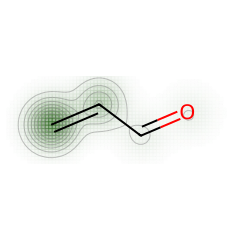

In [4]:
make_gradcam_heatmap(df.InChI[4], model=model)

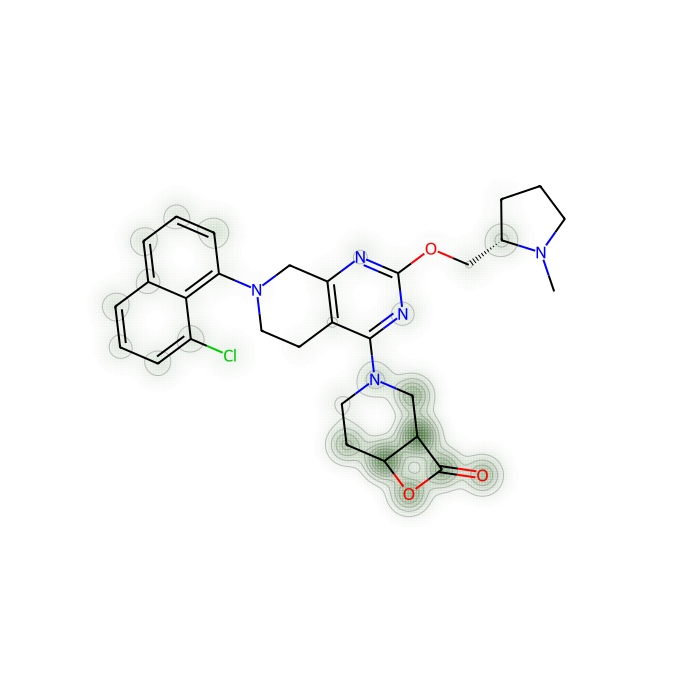

In [5]:
ibrutnib = "InChI=1S/C22H22N6O3/c1-4-19(29)27-8-7-15(12-27)28-22-20(21(23)24-13-25-22)18(26-28)6-5-14-9-16(30-2)11-17(10-14)31-3/h4,9-11,13,15H,1,7-8,12H2,2-3H3,(H2,23,24,25)/t15-/m0/s1"
ganfeborole = "InChI=1S/C10H13BClNO4/c12-6-1-2-7(16-4-3-14)10-9(6)8(5-13)17-11(10)15/h1-2,8,14-15H,3-5,13H2/t8-/m1/s1"
chembl8796 = "InChI=1S/C12H19N3O/c13-9-15-7-10(8-15)6-14-12(16)11-4-2-1-3-5-11/h10-11H,1-8H2,(H,14,16)"
nvdp = "C1CC(N(C1)C(=O)CNCCNC2=NC=C(C=C2)C#N)C#N"
dimefum = "InChI=1S/C6H8O4/c1-9-5(7)3-4-6(8)10-2/h3-4H,1-2H3/b4-3+"
g12 = "ClC1=CC=CC2=CC=CC(N3CC4=C(CC3)C(N5CC6C(CC5)OC6=O)=NC(OC[C@@H]7CCCN7C)=N4)=C21"


mol = g12
make_gradcam_heatmap(mol, model=model)

In [6]:
model.predict(encode(mol))

1/1 [==============================] - 1s 763ms/step


array([[0.99965787]], dtype=float32)